In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset
df = pd.read_csv(r'C:\Users\pc\OneDrive - Université Sultan Moulay Slimane\Bureau\pfe\diabetes_dataset_pfe1(in).csv', sep=';')

# Afficher les premières lignes
print(df.head())



   id_patient  Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL  \
0        1001   69            5  28.39    130.1           77.0    5.4  130.4   
1        1002   32            1  26.49    116.5           72.0    4.5   87.4   
2        1003   89           13  25.34    101.0           82.0    4.9  112.5   
3        1004   78           13  29.91    146.0          104.0    5.7   50.7   
4        1005   38            8  24.56    103.2           74.0    4.7  102.5   

    HDL  poids  Triglycerides   sexe  WaistCircumference  HipCircumference  \
0  44.0     53           50.0  Homme                90.5             107.9   
1  54.2    110          129.9  Femme               113.3              81.4   
2  56.8     52          177.6  Femme                84.7             107.2   
3  39.1    115          117.0  Homme               108.9             110.0   
4  29.1    117          145.9  Femme                84.1              92.8   

    WHR  FamilyHistory  DietType  Hypertension  Me

In [36]:
# Afficher des informations sur le DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_patient          9538 non-null   int64  
 1   Age                 9538 non-null   int64  
 2   Pregnancies         9538 non-null   int64  
 3   BMI                 9538 non-null   float64
 4   Glucose             9538 non-null   float64
 5   BloodPressure       9538 non-null   float64
 6   HbA1c               9538 non-null   float64
 7   LDL                 9538 non-null   float64
 8   HDL                 9538 non-null   float64
 9   poids               9538 non-null   int64  
 10  Triglycerides       9538 non-null   float64
 11  sexe                9538 non-null   object 
 12  WaistCircumference  9538 non-null   float64
 13  HipCircumference    9538 non-null   float64
 14  WHR                 9538 non-null   float64
 15  FamilyHistory       9538 non-null   int64  
 16  DietTy

In [41]:
colonnes_num = df.select_dtypes(include=['int64', 'float64']).columns
colonnes_cat = df.select_dtypes(include=['object', 'category']).columns


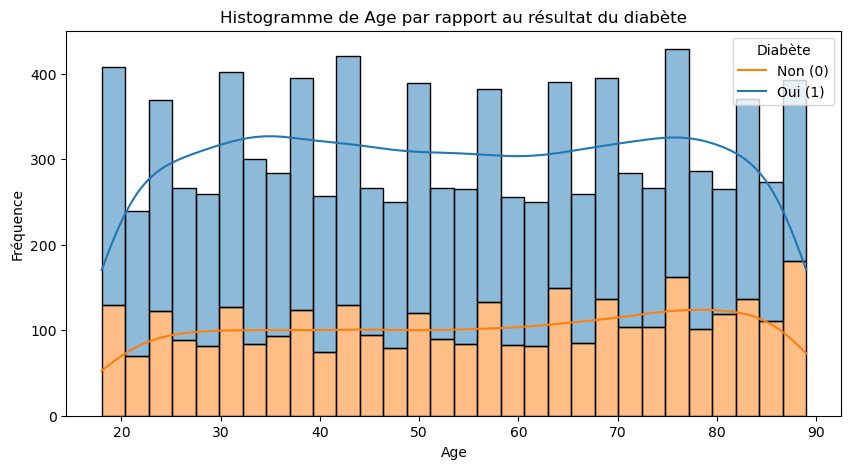

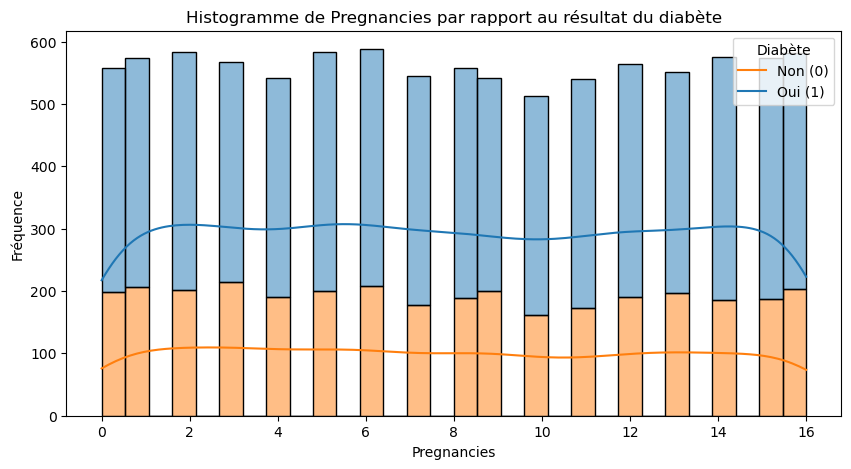

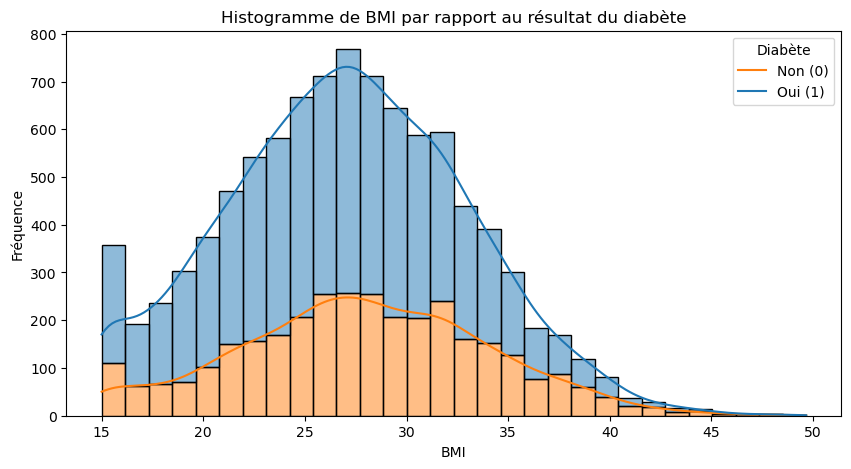

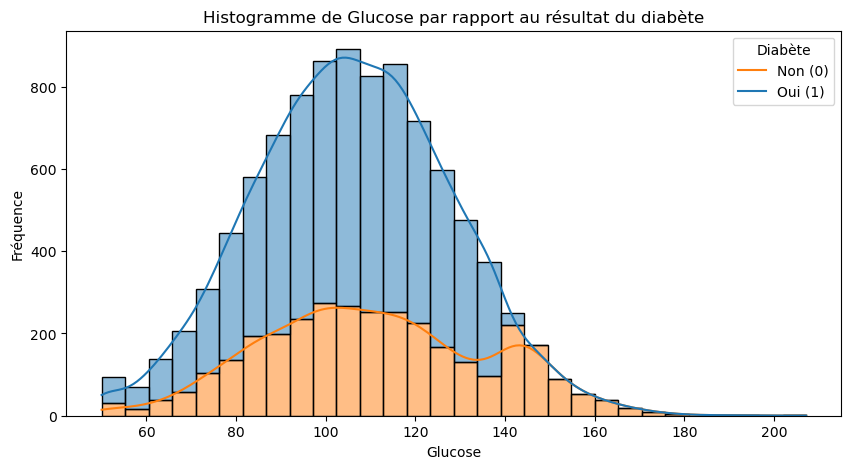

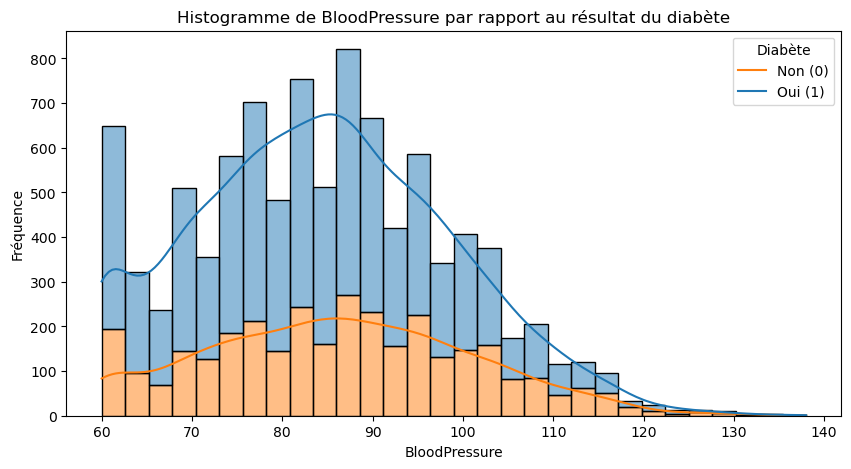

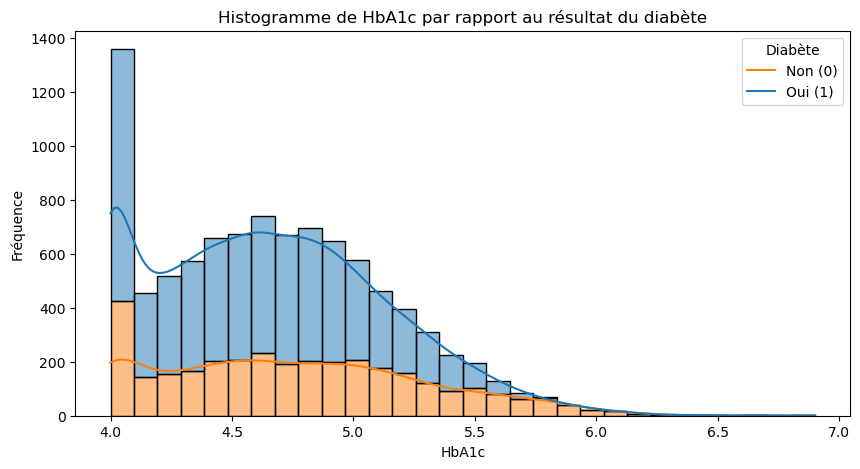

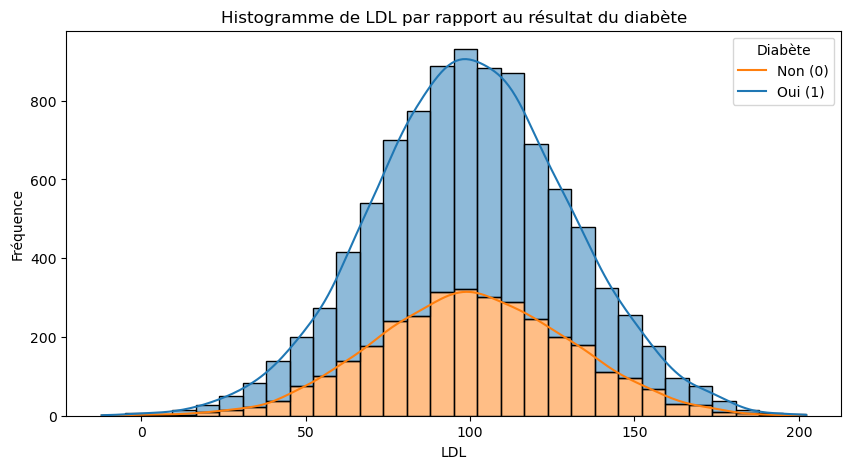

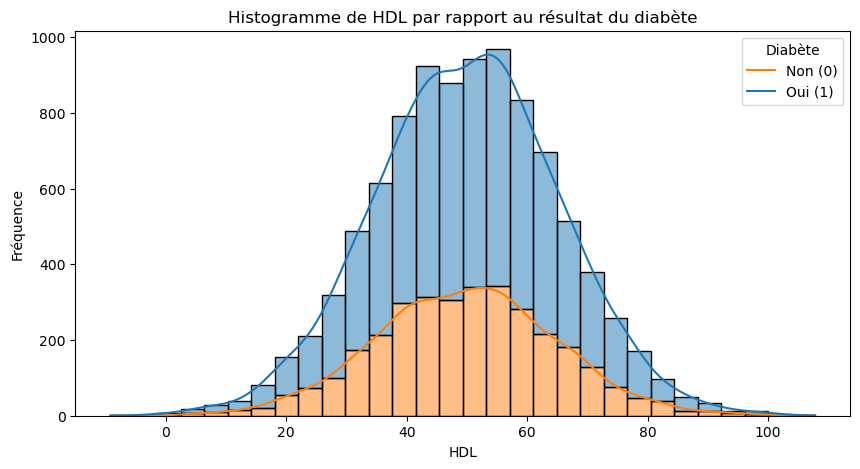

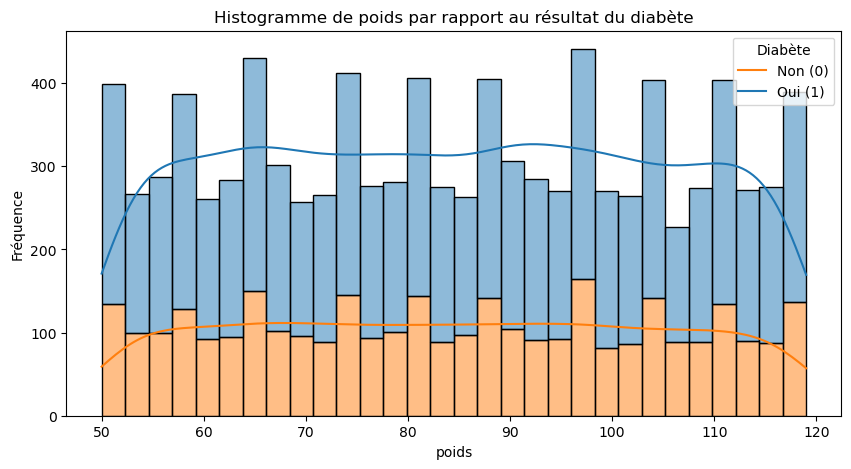

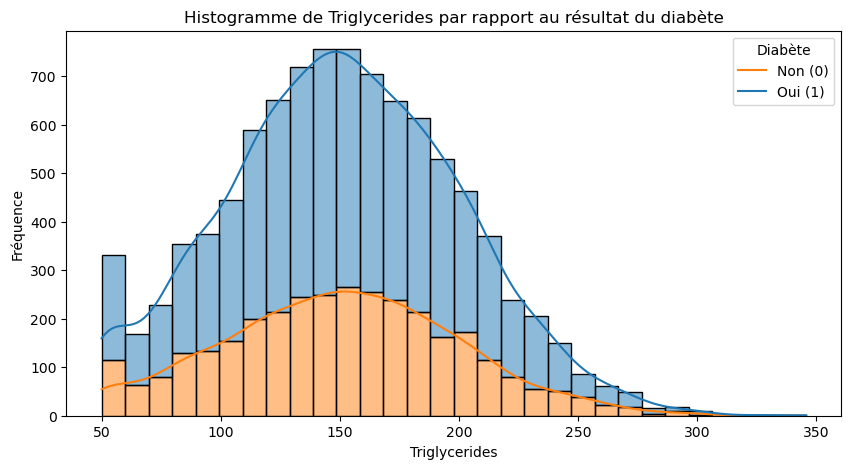

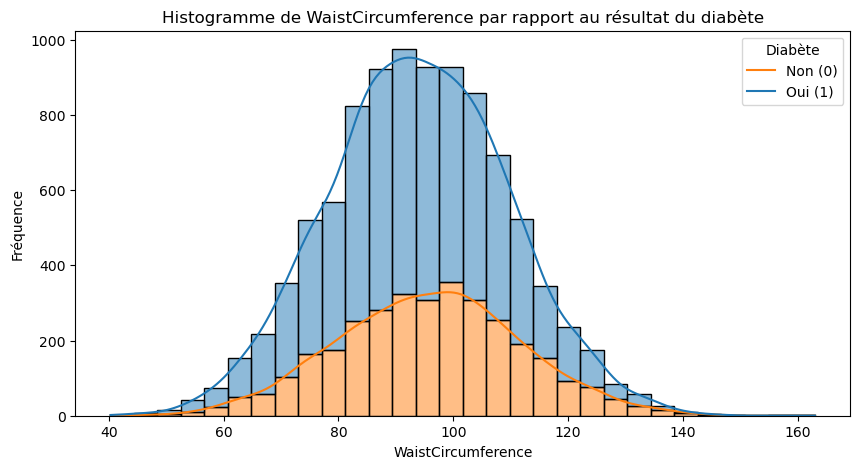

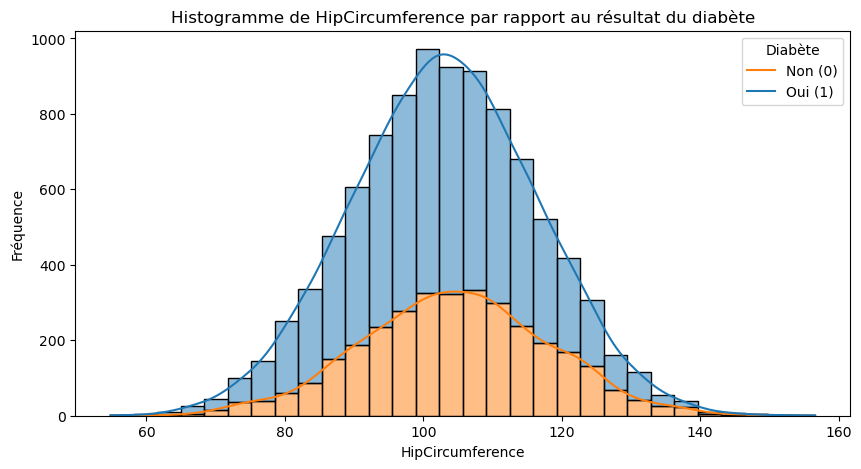

In [43]:
# Créer des histogrammes pour chaque variable continue
for var in variables_continues:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=var, hue='Outcome', multiple='stack', bins=30, kde=True)
    plt.title(f'Histogramme de {var} par rapport au résultat du diabète')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.legend(title='Diabète', labels=['Non (0)', 'Oui (1)'])
    plt.show()

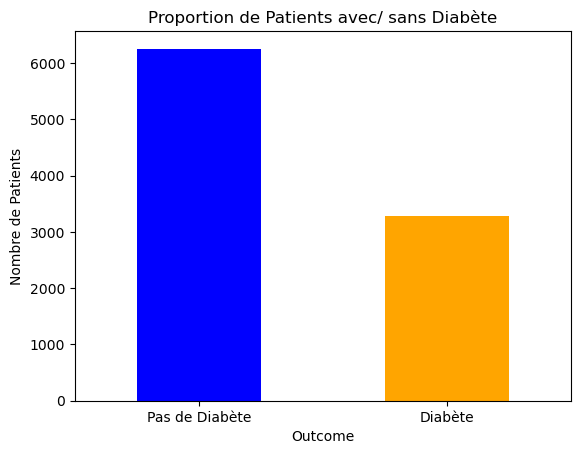

In [49]:
df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Proportion de Patients avec/ sans Diabète')
plt.xticks(ticks=[0, 1], labels=['Pas de Diabète', 'Diabète'], rotation=0)
plt.ylabel('Nombre de Patients')
plt.show()


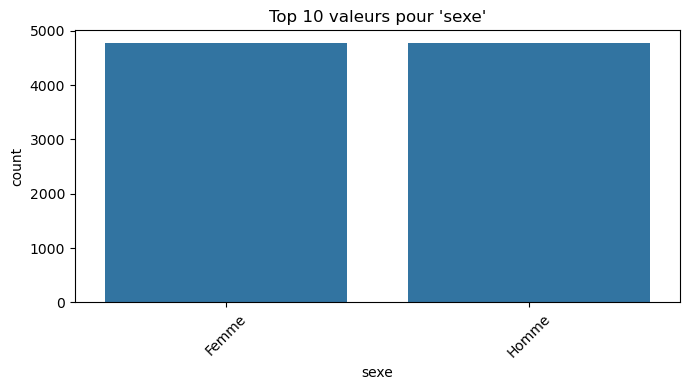

In [51]:
for col in colonnes_cat:
    plt.figure(figsize=(7, 4))
    top_categories = df[col].value_counts().nlargest(10).index  # Top 10 catégories
    sns.countplot(x=col, data=df[df[col].isin(top_categories)], order=top_categories)
    plt.title(f"Top 10 valeurs pour '{col}'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [53]:
# Statistiques descriptives
statistiques = df.describe(include='all')  # include='all' pour inclure les variables catégorielles
print(statistiques)

          id_patient          Age  Pregnancies          BMI      Glucose  \
count    9538.000000  9538.000000  9538.000000  9538.000000  9538.000000   
unique           NaN          NaN          NaN          NaN          NaN   
top              NaN          NaN          NaN          NaN          NaN   
freq             NaN          NaN          NaN          NaN          NaN   
mean     5769.500000    53.577584     7.986161    27.052364   106.104183   
std      2753.527768    20.764651     4.933469     5.927955    21.918590   
min      1001.000000    18.000000     0.000000    15.000000    50.000000   
25%      3385.250000    36.000000     4.000000    22.870000    91.000000   
50%      5769.500000    53.000000     8.000000    27.050000   106.000000   
75%      8153.750000    72.000000    12.000000    31.180000   121.000000   
max     10538.000000    89.000000    16.000000    49.660000   207.200000   

        BloodPressure        HbA1c          LDL          HDL        poids  \
count     

In [55]:
# Détection des outliers avec la méthode IQR
for col in colonnes_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"\n{col} → {len(outliers)} valeurs aberrantes détectées")



id_patient → 0 valeurs aberrantes détectées

Age → 0 valeurs aberrantes détectées

Pregnancies → 0 valeurs aberrantes détectées

BMI → 29 valeurs aberrantes détectées

Glucose → 34 valeurs aberrantes détectées

BloodPressure → 30 valeurs aberrantes détectées

HbA1c → 31 valeurs aberrantes détectées

LDL → 64 valeurs aberrantes détectées

HDL → 88 valeurs aberrantes détectées

poids → 0 valeurs aberrantes détectées

Triglycerides → 29 valeurs aberrantes détectées

WaistCircumference → 46 valeurs aberrantes détectées

HipCircumference → 55 valeurs aberrantes détectées

WHR → 87 valeurs aberrantes détectées

FamilyHistory → 0 valeurs aberrantes détectées

DietType → 0 valeurs aberrantes détectées

Hypertension → 10 valeurs aberrantes détectées

MedicationUse → 0 valeurs aberrantes détectées

Outcome → 0 valeurs aberrantes détectées


In [65]:
for col in colonnes_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[col].median()
    
    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

In [67]:
# Détection des outliers avec la méthode IQR
for col in colonnes_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"\n{col} → {len(outliers)} valeurs aberrantes détectées")


id_patient → 0 valeurs aberrantes détectées

Age → 0 valeurs aberrantes détectées

Pregnancies → 0 valeurs aberrantes détectées

BMI → 0 valeurs aberrantes détectées

Glucose → 0 valeurs aberrantes détectées

BloodPressure → 0 valeurs aberrantes détectées

HbA1c → 0 valeurs aberrantes détectées

LDL → 1 valeurs aberrantes détectées

HDL → 0 valeurs aberrantes détectées

poids → 0 valeurs aberrantes détectées

Triglycerides → 0 valeurs aberrantes détectées

WaistCircumference → 0 valeurs aberrantes détectées

HipCircumference → 0 valeurs aberrantes détectées

WHR → 0 valeurs aberrantes détectées

FamilyHistory → 0 valeurs aberrantes détectées

DietType → 0 valeurs aberrantes détectées

Hypertension → 0 valeurs aberrantes détectées

MedicationUse → 0 valeurs aberrantes détectées

Outcome → 0 valeurs aberrantes détectées


In [69]:
# Compter les valeurs manquantes par colonne
valeurs_manquantes = df.isnull().sum()

In [71]:
# Afficher les résultats
print("Valeurs manquantes par colonne :")
print(valeurs_manquantes[valeurs_manquantes > 0])


Valeurs manquantes par colonne :
Series([], dtype: int64)


In [73]:
import pandas as pd

# Identifier les doublons
doublons = df[df.duplicated()]

# Afficher les doublons
print("Doublons détectés :")
print(doublons)


Doublons détectés :
Empty DataFrame
Columns: [id_patient, Age, Pregnancies, BMI, Glucose, BloodPressure, HbA1c, LDL, HDL, poids, Triglycerides, sexe, WaistCircumference, HipCircumference, WHR, FamilyHistory, DietType, Hypertension, MedicationUse, Outcome, outlier]
Index: []

[0 rows x 21 columns]


In [75]:
# Normaliser les variables numériques
variables_numeriques = ['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 
                        'HbA1c', 'LDL', 'HDL', 'poids', 'Triglycerides', 
                        'WaistCircumference', 'HipCircumference']

data_normalise_minmax = df.copy()
data_normalise_minmax[variables_numeriques] = scaler.fit_transform(df[variables_numeriques])


In [77]:
# Afficher les premières lignes du DataFrame normalisé
print(data_normalise_minmax.head())

   id_patient       Age  Pregnancies       BMI   Glucose  BloodPressure  \
0        1001  0.718310       0.3125  0.470485  0.694709       0.265625   
1        1002  0.197183       0.0625  0.403725  0.576756       0.187500   
2        1003  1.000000       0.8125  0.363317  0.442324       0.343750   
3        1004  0.845070       0.8125  0.523893  0.832611       0.687500   
4        1005  0.281690       0.5000  0.335910  0.461405       0.218750   

   HbA1c       LDL      HDL     poids  ...   sexe WaistCircumference  \
0   0.70  0.691374  0.42625  0.043478  ...  Homme           0.457788   
1   0.25  0.416613  0.55375  0.869565  ...  Femme           0.728894   
2   0.45  0.576997  0.58625  0.028986  ...  Femme           0.388823   
3   0.85  0.182109  0.36500  0.942029  ...  Homme           0.676576   
4   0.35  0.513099  0.24000  0.971014  ...  Femme           0.381688   

   HipCircumference   WHR  FamilyHistory  DietType  Hypertension  \
0          0.567227  0.84              0        

In [107]:
df_selected = df[['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 
                        'HbA1c', 'LDL', 'HDL', 'poids', 'Triglycerides', 
                        'WaistCircumference', 'HipCircumference']]


In [109]:
correlation_matrix = df_selected.corr()
print(correlation_matrix)


                         Age  Pregnancies       BMI   Glucose  BloodPressure  \
Age                 1.000000     0.010714  0.021027  0.484018       0.424154   
Pregnancies         0.010714     1.000000 -0.013653  0.010952      -0.004853   
BMI                 0.021027    -0.013653  1.000000  0.542097       0.590696   
Glucose             0.484018     0.010952  0.542097  1.000000       0.529043   
BloodPressure       0.424154    -0.004853  0.590696  0.529043       1.000000   
HbA1c               0.390200     0.007918  0.443176  0.797244       0.430528   
LDL                -0.002690     0.007993  0.020569  0.020477       0.002270   
HDL                -0.003635     0.001967 -0.022814 -0.020144      -0.009740   
poids               0.000528     0.024507 -0.010275 -0.003985      -0.001292   
Triglycerides       0.012018     0.006628 -0.015636 -0.012168      -0.011678   
WaistCircumference  0.028067    -0.016122  0.743647  0.414905       0.447221   
HipCircumference    0.023546    -0.00655

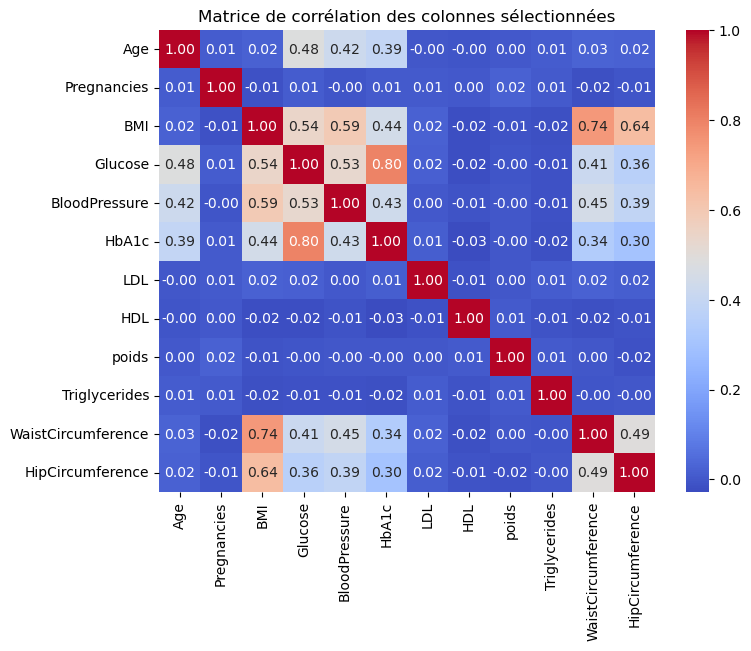

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des colonnes sélectionnées")
plt.show()


In [79]:
#encoder les variables categoriques
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['sexe']
['sexe']


In [83]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

   id_patient  Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL  \
0        1001   69            5  28.39    130.1           77.0    5.4  130.4   
1        1002   32            1  26.49    116.5           72.0    4.5   87.4   
2        1003   89           13  25.34    101.0           82.0    4.9  112.5   
3        1004   78           13  29.91    146.0          104.0    5.7   50.7   
4        1005   38            8  24.56    103.2           74.0    4.7  102.5   

    HDL  poids  ...  WaistCircumference  HipCircumference   WHR  \
0  44.0     53  ...                90.5             107.9  0.84   
1  54.2    110  ...               113.3              81.4  0.91   
2  56.8     52  ...                84.7             107.2  0.79   
3  39.1    115  ...               108.9             110.0  0.99   
4  29.1    117  ...                84.1              92.8  0.91   

   FamilyHistory  DietType  Hypertension  MedicationUse  Outcome  outlier  \
0              0         0           0.

In [117]:
df_selected = df[['sexe', 'FamilyHistory', 'DietType','Hypertension','MedicationUse','Outcome']]


In [119]:
from sklearn.preprocessing import LabelEncoder

df_selected = df_selected.copy()
label_enc = LabelEncoder()

for col in df_encoded.columns:
    df_selected[col] = label_enc.fit_transform(df_encoded[col])


In [123]:
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']


In [127]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_selected.copy()
label_enc = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])


In [129]:
print(df_encoded.min())


sexe                  0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
id_patient            0
Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
poids                 0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
outlier               0
sexe_Homme            0
dtype: int64


In [133]:
from sklearn.feature_selection import chi2

X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

chi2_scores, p_values = chi2(X, y)


In [135]:
import pandas as pd
from sklearn.feature_selection import chi2

# Test Chi²
chi2_scores, p_values = chi2(X, y)

# Résultats dans un DataFrame
resultats = pd.DataFrame({
    'Variable': X.columns,
    'Chi2_Score': chi2_scores,
    'P_Value': p_values
})

# Trier par Chi2 décroissant
resultats = resultats.sort_values(by='Chi2_Score', ascending=False)

# Affichage
print(resultats)


              Variable    Chi2_Score        P_Value
8                  BMI  27515.732873   0.000000e+00
9              Glucose  19716.427146   0.000000e+00
1        FamilyHistory   5499.256551   0.000000e+00
16  WaistCircumference   3736.658842   0.000000e+00
17    HipCircumference   2951.933213   0.000000e+00
5           id_patient   2323.651795   0.000000e+00
11               HbA1c    621.252855  3.992695e-137
10       BloodPressure    617.813908  2.234733e-136
6                  Age    541.585354  8.522031e-120
12                 LDL    469.172505  4.851076e-104
15       Triglycerides    233.594689   9.804528e-53
13                 HDL     97.889757   4.423360e-23
19             outlier     26.062832   3.304851e-07
4        MedicationUse     23.701908   1.124710e-06
18                 WHR     16.195200   5.713872e-05
7          Pregnancies      9.615551   1.929365e-03
14               poids      3.498032   6.144182e-02
20          sexe_Homme      3.418922   6.445308e-02
2           

In [137]:
significatives = resultats[resultats['P_Value'] < 0.05]
print("Variables significatives selon le test du Chi² :")
print(significatives)


Variables significatives selon le test du Chi² :
              Variable    Chi2_Score        P_Value
8                  BMI  27515.732873   0.000000e+00
9              Glucose  19716.427146   0.000000e+00
1        FamilyHistory   5499.256551   0.000000e+00
16  WaistCircumference   3736.658842   0.000000e+00
17    HipCircumference   2951.933213   0.000000e+00
5           id_patient   2323.651795   0.000000e+00
11               HbA1c    621.252855  3.992695e-137
10       BloodPressure    617.813908  2.234733e-136
6                  Age    541.585354  8.522031e-120
12                 LDL    469.172505  4.851076e-104
15       Triglycerides    233.594689   9.804528e-53
13                 HDL     97.889757   4.423360e-23
19             outlier     26.062832   3.304851e-07
4        MedicationUse     23.701908   1.124710e-06
18                 WHR     16.195200   5.713872e-05
7          Pregnancies      9.615551   1.929365e-03


In [143]:
variables_a_supprimer = [
    'poids', 'sexe_Homme', 'DietType', 'id_patient', 'sexe', 'Hypertension','HbA1c'	,
'WaistCircumference','HipCircumference','poids'
]


In [145]:
# Suppression des variables
df_cleaned = df.drop(columns=variables_a_supprimer, errors='ignore')

In [147]:
# Affichage des variables restantes
print(df_cleaned.columns)

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'LDL', 'HDL',
       'Triglycerides', 'WHR', 'FamilyHistory', 'MedicationUse', 'Outcome',
       'outlier'],
      dtype='object')


In [153]:
df_cleaned['Outcome'].value_counts()


Outcome
0    6256
1    3282
Name: count, dtype: int64

In [157]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Séparer les features et la cible
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome']

# Séparation train/test avant le suréchantillonnage (recommandé)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [160]:
import numpy as np
import pandas as pd

print(pd.Series(y_resampled).value_counts())


Outcome
0    4981
1    4981
Name: count, dtype: int64


In [166]:
df_cleaned.to_csv('donnees_pretentrainees.csv', index=False)
